<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day67.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Attention Mechanisms

# Understanding the Limitations of RNNs and the Need for Attention

* **Challenges of RNNs**
    * Sequential Processing
    * Long-Term Dependency Problems
    * Fixed Context Vector
* **The Role of Attention Mechanisms**
    * Attention overcomes these limitations by allowing the model to focus on specific parts of the input sequence dynamically during each output generation step
    * Instead of relying on a single context vector, attention provides a weighted combination of all input tokens relevant to the current output token

# Basics of the Attention Mechanism

* **Core Components**
    * **Queries (Q)**
        * Represents the current focus of the model (e.g., the current decoder state in Seq2Seq tasks)
    * **Keys (K)**
        * Encoded representations of the input sequence
    * **Values (V)**
        * Additional information associated with the keys.

# Basics of the Attention Mechanism

* **Attention Mechanism**
    * The attention score is computed using the dot product of the query and keys, followed by a softmax function to normalize into a probability distribution
    * The weighted sum of the values forms the context vector

    $$Attention(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

---

### Breakdown of the Formula

The formula above is for **Scaled Dot-Product Attention** and can be broken down into steps:

1.  **Alignment Score:** The dot product $QK^T$ measures the similarity between the **Query** and all **Keys**.
2.  **Scaling:** Dividing by $\sqrt{d_k}$ (the square root of the dimension of the keys) is a scaling factor to prevent the dot products from becoming too large and pushing the softmax into regions with extremely small gradients.
3.  **Normalization:** The $\text{softmax}$ function converts the scaled scores into a probability distribution, which represents the **Attention Weights**.
4.  **Context Vector:** Multiplying the Attention Weights by the **Values** ($V$) yields the final **Context Vector**, which is a weighted sum of the input information, focused on the most relevant parts.

##  Types of Attention
* **Self-Attention**
    * The query, key, and value all come from the **same input sequence**
    * Widely used in **Transformer models** for learning interdependencies within a sequence
* **Multi-Head Attention**
    * Extends self-attention by applying **multiple attention mechanisms in parallel**
    * Captures different aspects of relationships in the sequence
    * $$MultiHead(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, \ldots, \text{head}_h)W^O$$
* where each head computes attention with different learned projections of $Q$, $K$, and $V$

**Objective**
- Implement a basic Attention Mechanism using NumPy or PyTorch and visualize it's impact on a simple sequence task

In [3]:
import numpy as np

# Define queries, keys and values
queries = np.array([0, 1, 0, 1, 1])
keys = np.array([[1, 0, 1, 1, 1], [0, 0, 1, 1, 1]])
# Correcting values to match the number of keys (2 keys -> 2 value vectors)
values = np.array([[10, 0], [0, 10]])

# Compute attention scores
# Reshape queries to be a row vector (1, N) to ensure scores is (1, M)
scores = np.dot(queries.reshape(1, -1), keys.T)

# Apply softmax to normalize scores
def softmax(x):
    # This function expects x to be 2D, which it now is due to reshaping queries
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

attention_weights = softmax(scores)

# Compute Weighted sum of values
# Now attention_weights is (1, 2) and values is (2, 2), so dot product is valid.
context = np.dot(attention_weights, values)

print("Attention Weights:")
print(attention_weights)
print("Context Vector:")
print(context)

Attention Weights:
[[0.5 0.5]]
Context Vector:
[[5. 5.]]


Attention Weights:
tensor([[0.5000, 0.5000]])
Context Vector:
tensor([[5., 5.]])


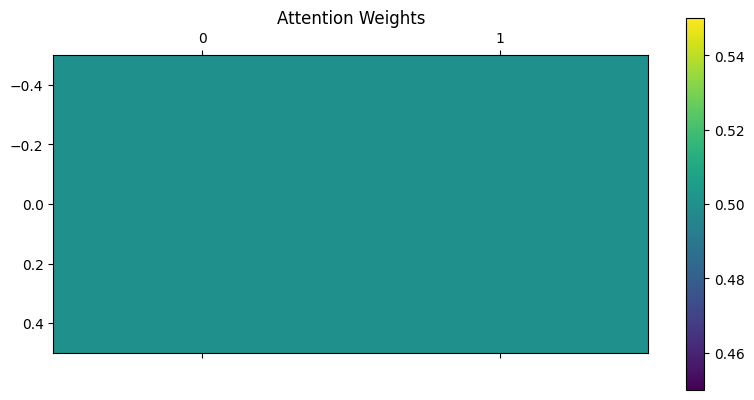

In [6]:
import torch
import torch.nn.functional as F
import numpy as np # Ensure numpy is imported for initial array creation

# Define queries, keys and values as NumPy arrays first
queries_np = np.array([0, 1, 0, 1, 1])
keys_np = np.array([[1, 0, 1, 1, 1], [0, 0, 1, 1, 1]])
values_np = np.array([[10, 0], [0, 10]])

# Convert NumPy arrays to PyTorch tensors
queries = torch.tensor(queries_np, dtype=torch.float32)
keys = torch.tensor(keys_np, dtype=torch.float32)
values = torch.tensor(values_np, dtype=torch.float32)

# Define attention scores
# Reshape queries to (1, N) for matrix multiplication
scores = torch.matmul(queries.unsqueeze(0), keys.T)

# Apply softmax to normalize scores
attention_weights = F.softmax(scores, dim=-1)

# Compute weighted sum of values
context = torch.matmul(attention_weights, values)

print("Attention Weights:")
print(attention_weights)
print("Context Vector:")
print(context)

import matplotlib.pyplot as plt
# Visualize attention weights
plt.matshow(attention_weights)
plt.colorbar()
plt.title("Attention Weights")
plt.show()